<h1>CV Problem</h1>
<h2>Keras model for multiclass classification using CNN</h2>

<p>Importing all packages i.e. Layers(conv2d,dense) and their parameters</p>

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Activation
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
from keras.layers.normalization import BatchNormalization

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical


Using TensorFlow backend.


<h2>Extracting given dataset and Preprocessing it to an acceptable format for CNN</h2>


In [ ]:
#to handle pkl files
import pickle
with open('train_image.pkl','rb') as f:
    train=pickle.load(f)
import numpy as np
#storing training images in numpy array
x=np.array(train)
#reshaping it for input shape of first convolutional layer
x=np.reshape(x,(-1,28,28,1))
print(x.shape)
with open('train_label.pkl','rb') as f:
    train_set1=pickle.load(f)
train_y=np.array(train_set1)
#One-Hot Encoding to be done for classes>2
y=to_categorical(train_y)
print(y.shape)
#checking the shape of train_x and train_y

<h2>Plotting and checking dataset</h2>

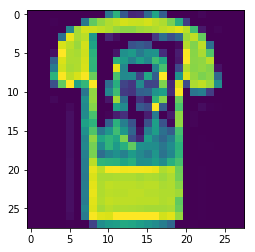

In [14]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

plt.imshow(x[900].reshape((28,28)))
plt.show()

In [15]:
for i in y:
    print (i)

[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0

<h2>Splitting dataset into training and validation ratio 90:10</h2>
<p>Using scikit learn's <b>train_test_split</b> to divide dataset</p>

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=50, test_size=0.1)


<h2>Creating a Sequential Model</h2>
<p>Model has 4 convolutional layers and 3 dense layers</p> 
<p>Flatteing into 1d array</p>
<p>Last layer has 7 output neurons for range (0,2,3,6)</p>

In [5]:
cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))#first layer has 32 input neurons
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())#normalizing the input to next layer
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten()) 

cnn4.add(Dense(256, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.5))

cnn4.add(Dense(7, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<h2>Compiling the model and specifying optimizer and learning rate</h2>

In [0]:
adam=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=adam,
              metrics=['accuracy'])

<h2>Training the model 50 epochs and give 10 images as batch as input</h2>

In [7]:
cnn4.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test),batch_size=10,shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 7200 samples, validate on 800 samples
Epoch 1/50
7200/7200 [==============================] - 62s 9ms/step - loss: 1.2440 - acc: 0.5971 - val_loss: 0.9315 - val_acc: 0.7250
Epoch 2/50
7200/7200 [==============================] - 59s 8ms/step - loss: 0.7615 - acc: 0.7171 - val_loss: 0.5785 - val_acc: 0.7738
Epoch 3/50
7200/7200 [==============================] - 58s 8ms/step - loss: 0.6317 - acc: 0.7594 - val_loss: 0.6556 - val_acc: 0.7213
Epoch 4/50
7200/7200 [==============================] - 58s 8ms/step - loss: 0.5693 - acc: 0.7844 - val_loss: 0.3982 - val_acc: 0.8550
Epoch 5/50
7200/7200 [==============================] - 58s 8ms/step - loss: 0.5555 - acc: 0.7935 - val_loss: 0.3788 - val_acc: 0.8412
Epoch 6/50
7200/7200 [==============================] - 59s 8ms/step - loss: 0.5144 - acc: 0.8040 - val_loss: 0.3677 - val_acc: 0.8450
Epoch 7/50
7200/7200 [==============================] - 59s 8ms/step - loss: 0.5110 - acc: 0.80

<h2>Result is 91%accurate model</h2>

<h2>Loading the test dataset and reshaping the numpy array</h2>

In [0]:
with open('test_image.pkl','rb') as f:
    test=pickle.load(f)
test_image=np.array(test)
test_image=np.reshape(test_image,(-1,28,28,1))

<h2>Predicting 2000 test images and showing their respective classes</h2>

In [0]:
ynew=cnn4.predict_classes(test_image)

In [11]:
for i in range(len(test_image)):
	print("%d : Predicted=%s" % (i, ynew[i]))
  

0 : Predicted=0
1 : Predicted=0
2 : Predicted=0
3 : Predicted=0
4 : Predicted=0
5 : Predicted=0
6 : Predicted=0
7 : Predicted=0
8 : Predicted=0
9 : Predicted=0
10 : Predicted=0
11 : Predicted=0
12 : Predicted=6
13 : Predicted=0
14 : Predicted=0
15 : Predicted=0
16 : Predicted=0
17 : Predicted=0
18 : Predicted=0
19 : Predicted=0
20 : Predicted=0
21 : Predicted=0
22 : Predicted=0
23 : Predicted=0
24 : Predicted=0
25 : Predicted=0
26 : Predicted=0
27 : Predicted=0
28 : Predicted=0
29 : Predicted=0
30 : Predicted=0
31 : Predicted=0
32 : Predicted=0
33 : Predicted=0
34 : Predicted=0
35 : Predicted=0
36 : Predicted=0
37 : Predicted=0
38 : Predicted=0
39 : Predicted=6
40 : Predicted=6
41 : Predicted=0
42 : Predicted=0
43 : Predicted=0
44 : Predicted=6
45 : Predicted=0
46 : Predicted=6
47 : Predicted=0
48 : Predicted=0
49 : Predicted=0
50 : Predicted=0
51 : Predicted=0
52 : Predicted=0
53 : Predicted=0
54 : Predicted=0
55 : Predicted=0
56 : Predicted=0
57 : Predicted=0
58 : Predicted=0
59 : Pr

<h2>Saving the result into CSV file and saving the model for future purpose</h2>

In [0]:
final=[]
for index,predict in enumerate (ynew):
  output=[]
  output.append(index)   #image index
  output.append(ynew[index])#class value corresponding to that index
  final.append(output)
np.savetxt('Nishant Routray.csv',final,delimiter=",")

<h2>Restore this below model to run on different test data without fitting the model again</h2>

In [0]:
cnn4.save('my_model_4.h5')

<h2>Restoring and using the saved model</h2>

In [16]:
new_model = keras.models.load_model('my_model_4.h5')
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
__________